# Visualización de valores faltantes en una variable

Recordemos el ejemplo anterior

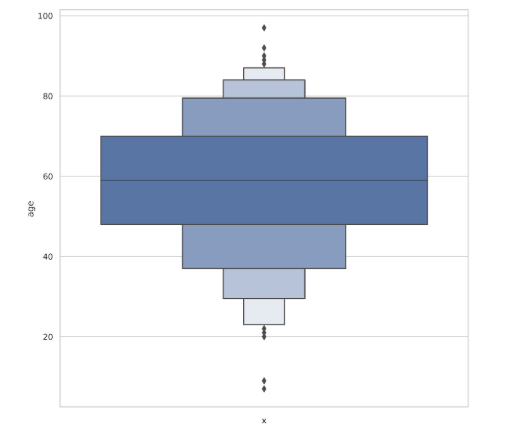

Es decir la distribución de edades sin considerar otra variable. 

Después añadimos la versión de si existe o no el peso `weight_lbs_NA`

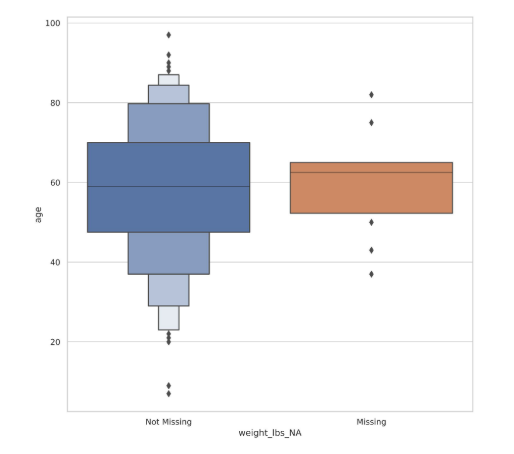

Y así volvimos a graficar la distribución de edades `age` para ver si existía alguna diferencia en estos casos.

Justamente este tipo de visualizaciones nos ayudará a entender de manera más rápida, si está ocurriendo un sesgo en la presencia o ausencia de valores faltantes.

Exploremos con código

### Importando librerías

In [1]:
### Importando librerías
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

### Configurar el aspecto general de las gráficas del proyecto

In [9]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

### Leer conjunto de datos

In [2]:
#Cargar conjunto de datos
riskfactors = pyreadr.read_r('dataset/riskfactors.rda')

#Convertirlo a Data Frame
riskfactors_df = next(iter(riskfactors.values()))

#Borrar el diccionario
del riskfactors

In [3]:
#Verificar tipo 
#type(riskfactors_df)

#LLamar al data frame
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


### Visualización de valores faltantes con una variable

In [6]:
#Añadir nuestra extensión de Pandas
%run pandas-missing-extension-re2.py

In [7]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)   
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


Una vez que ya tenemos nuestra matriz de sombras. Procederemos a realizar lo siguiente:

<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

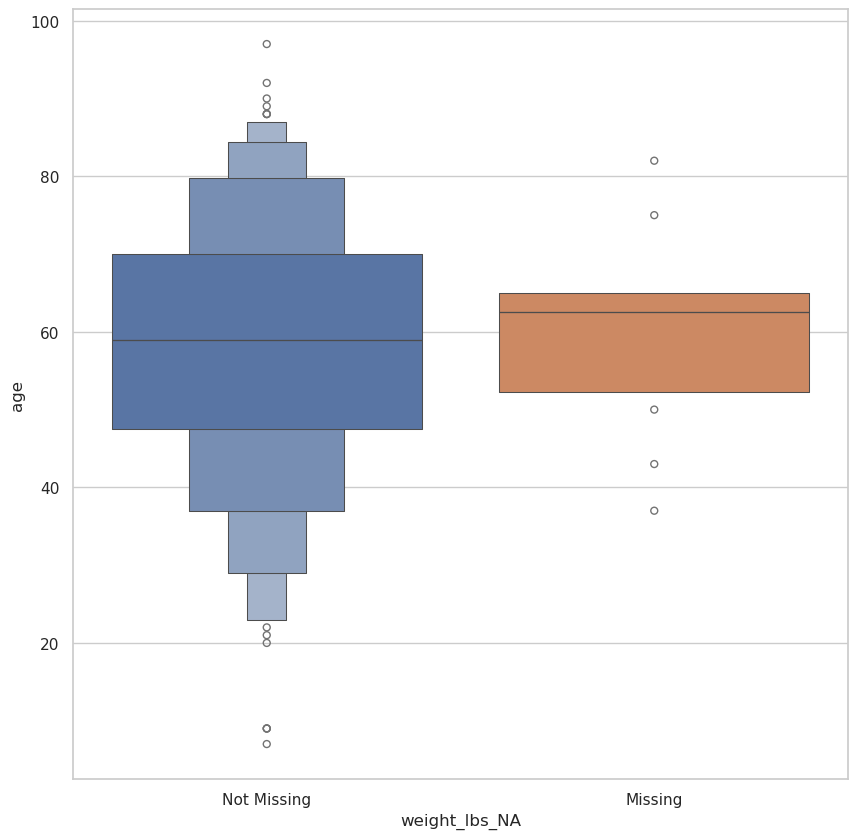

In [14]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x='weight_lbs_NA',
                y='age', #Variable que queramos observar su distribución
                hue = 'weight_lbs_NA'
            )
        )
    )
)

Hemos recreado la imagen que estaba en las diapositivas, además digamos que es muy potente el poseer la matriz de sombras para obtener estadísticos y aplicar los análisis que hemos hecho para los datos, pero esta vez con datos faltantes.

Vamos ahora a aplicar otro tipo de visualización para nuestra distribución.

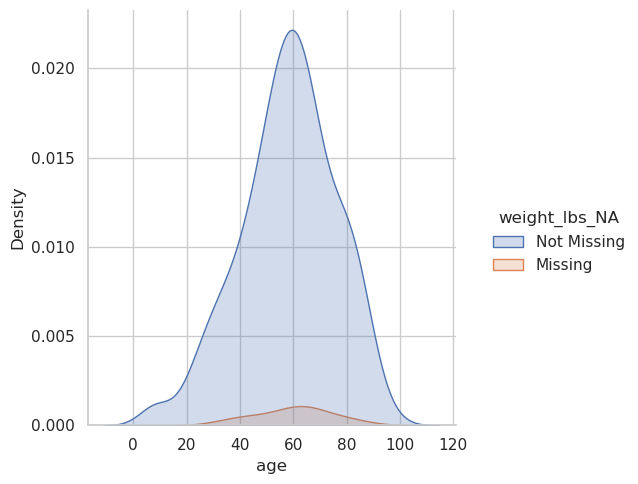

In [18]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                hue = 'weight_lbs_NA',
                kind='kde', #generar distribución de densidad
                fill=True
            )
        )
    )
)

Podemos ver la distribución de nuestros pesos `weight_lbs_NA` la que tenemos en la densidad y podemos ver donde se están acumulando la de nuestros valores faltantes. Vemos que se repite la distribución simplemente que de una manera más pequeña. Ademas en la azul tenemos un pico por debajo de los 60 y en la naranja (faltantes) un pico por encima de los 60.

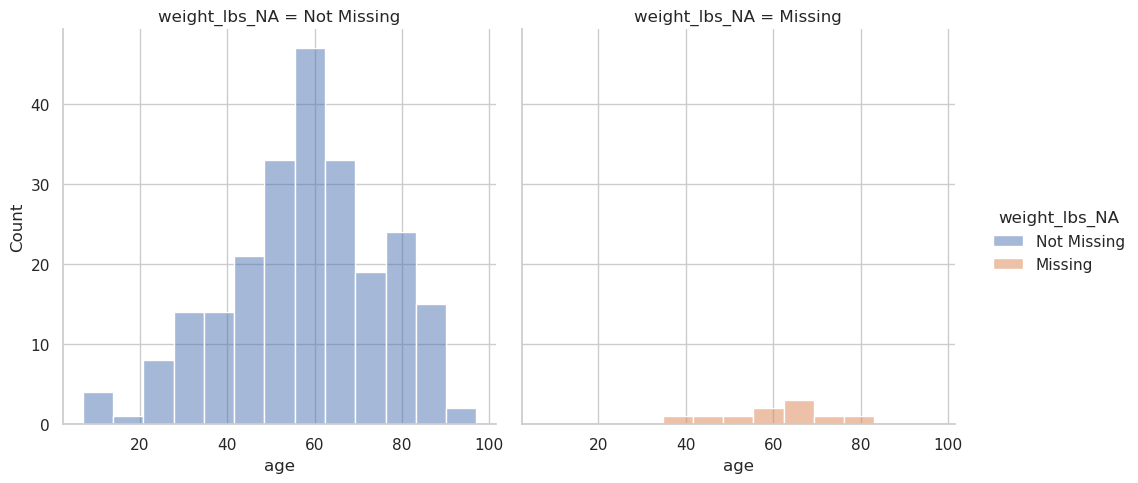

In [20]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col = 'weight_lbs_NA', 
                hue='weight_lbs_NA'
            )
        )
    )
)

Ahora tenemos un histograma que nos da los resultados que estamos esperando, pero es un poco difícil de comparar las 2 gráficas porque tenemos más datos que valores faltantes, entonces es muy difícil saber qu está pasando.

Añadiremos un parámetro extra.

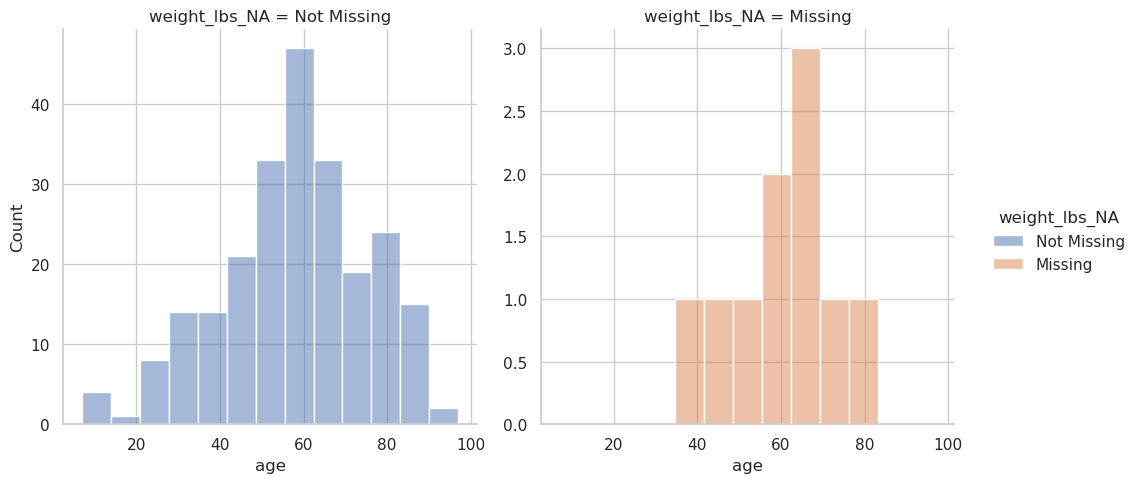

In [22]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col = 'weight_lbs_NA', 
                hue='weight_lbs_NA',
                facet_kws={'sharey':False}
            )
        )
    )
)

El parámetro `sharey = False` va a hacer que cada gráfica tenga un valor diferente en el eje `Y`, así de esta manera se ajusta para que los valores se normalicen y visualmente sean del mismo tamaño. Es decir que sus ejes `y` tengan diferente escala.

Aquí podríamos aplicar más conceptos de exploración de datos; modificar tamaño de `barras` o asociar otras variables para saber si están ocurriendo algunos comportamientos en los datos. 

También podemos querer visualizarlo de otra manera diferente.

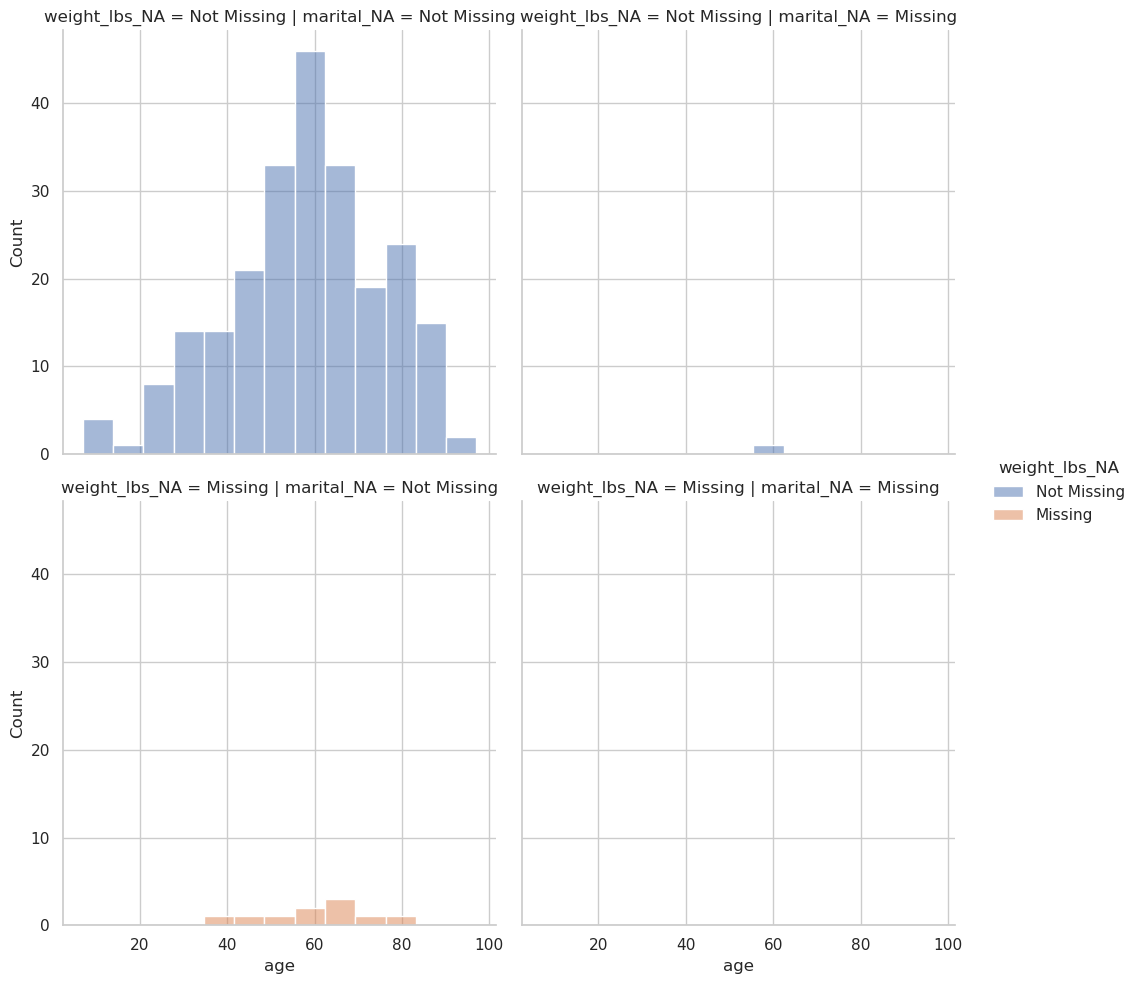

In [25]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col = 'marital_NA', 
                row='weight_lbs_NA',
                hue='weight_lbs_NA'
            )
        )
    )
)

Igual podríamos modificar los parámetros para que las gráficas sigan su propia escala y ver si siguen algún patrón.

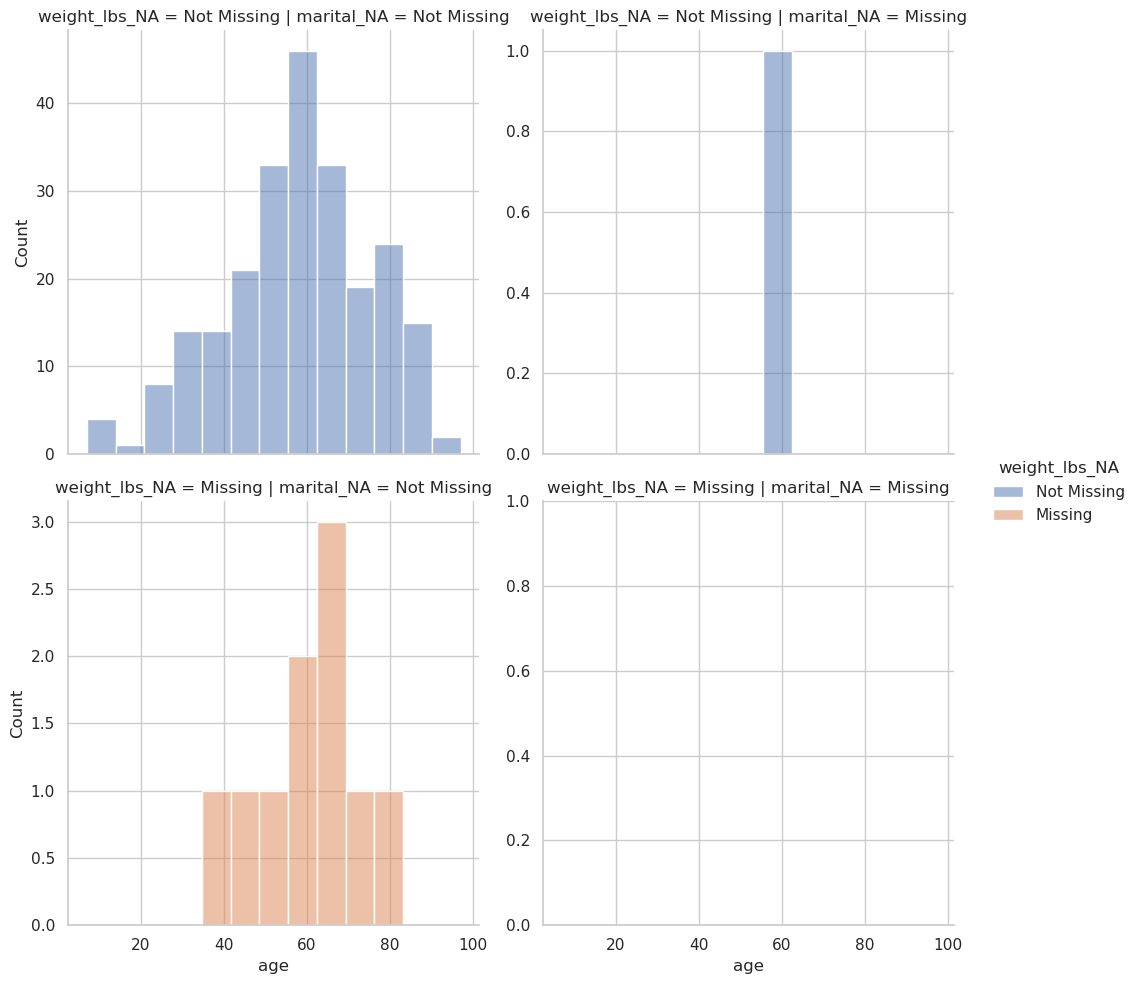

In [26]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col = 'marital_NA', 
                row='weight_lbs_NA',
                hue='weight_lbs_NA',
                facet_kws={'sharey':False}
            )
        )
    )
)

Por ejemplo aquí podemos ver que no existen valores en `age` cuando:
- weight_lbs_NA = Missing | marital_NA = Missing

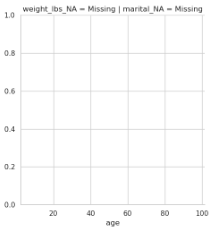

In [23]:
riskfactors_df.columns

Index(['state', 'sex', 'age', 'weight_lbs', 'height_inch', 'bmi', 'marital',
       'pregnant', 'children', 'education', 'employment', 'income', 'veteran',
       'hispanic', 'health_general', 'health_physical', 'health_mental',
       'health_poor', 'health_cover', 'provide_care', 'activity_limited',
       'drink_any', 'drink_days', 'drink_average', 'smoke_100', 'smoke_days',
       'smoke_stop', 'smoke_last', 'diet_fruit', 'diet_salad', 'diet_potato',
       'diet_carrot', 'diet_vegetable', 'diet_juice'],
      dtype='object')